In [20]:
import pandas as pd
from Functions import *
from Telescope import *
import Ariel

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

## Comparing results of ExoEcho with Billy Edwards' results

In [21]:
## to create data or load it!
load_data = True

In [22]:
target_list = Ariel.getInstrument("Visphot").target_list


target_list["SNR param"] = target_list.apply(lambda x: "TSM" if x["Preferred Method"] == "Transit" else "ESM", 
                                                 axis=1)
for i in range(1,4):
    target_list[f"Tier {i} Observations Edwards"] = target_list[f"Tier {i} Observations"]
    target_list.drop(f"Tier {i} Observations", axis=1, inplace=True)
    

target_list.head(3)

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 3 Eclipses,Preferred Method,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier,SNR param,Tier 1 Observations Edwards,Tier 2 Observations Edwards,Tier 3 Observations Edwards
0,TOI-5704,0.73,-0.08,0.08,4590.0,-126.0,126.0,0.76,-0.06,0.06,...,540.0,Transit,0,0,0,1,TSM,4.0,44.0,88.0
1,TOI-672,0.54,-0.02,0.02,3765.0,-65.0,65.0,0.54,-0.02,0.02,...,233.0,Transit,0,0,0,2,TSM,1.0,11.0,21.0
2,TOI-199,0.94,-0.01,0.00,5255.0,-10.0,12.0,0.82,0.00,0.00,...,56322.0,Transit,0,0,0,2,TSM,1.0,5.0,9.0


In [23]:
# creating data
if not load_data:
    for i in range(1,4):
        print(f"starting tier {i}")
        target_list[[f"Tier {i} Observations ExoEcho", f"Tier {i} SNR ExoEcho"]]  = target_list.apply(lambda x: pd.Series(Ariel.findTierObservations(x["Planet Name"], 
                                                                                                            i, 
                                                                                                            x["SNR param"], 
                                                                                                            7)),
                                                                        axis=1)
        
    for i in range(1,4):
        target_list[f"Tier {i} Observation num diff (ExoEcho-Edwards)"] = target_list.apply(lambda x: x[f"Tier {i} Observations ExoEcho"] - x[f"Tier {i} Observations Edwards"],
                                                                                        axis=1)
        

    # saving target list
    target_list.to_csv("Ariel_Target_Comparison_List.csv", index=False)
    
# loading data
else:
    target_list = pd.read_csv("Ariel_Target_Comparison_List.csv")

target_list.head(3)

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 3 Observations Edwards,Tier 1 Observations ExoEcho,Tier 1 SNR ExoEcho,Tier 2 Observations ExoEcho,Tier 2 SNR ExoEcho,Tier 3 Observations ExoEcho,Tier 3 SNR ExoEcho,Tier 1 Observation num diff (ExoEcho-Edwards),Tier 2 Observation num diff (ExoEcho-Edwards),Tier 3 Observation num diff (ExoEcho-Edwards)
0,TOI-5704,0.73,-0.08,0.08,4590.0,-126.0,126.0,0.76,-0.06,0.06,...,88.0,2.0,8.847392,20.0,7.074745,43.0,7.054779,-2.0,-24.0,-45.0
1,TOI-672,0.54,-0.02,0.02,3765.0,-65.0,65.0,0.54,-0.02,0.02,...,21.0,1.0,15.374475,4.0,7.811766,7.0,7.041787,0.0,-7.0,-14.0
2,TOI-199,0.94,-0.01,0.00,5255.0,-10.0,12.0,0.82,0.00,0.00,...,9.0,1.0,12.102576,6.0,7.474499,12.0,7.180927,0.0,1.0,3.0


In [24]:
# planet with the highest SNR
target_list[target_list["Tier 1 SNR ExoEcho"] == target_list["Tier 1 SNR ExoEcho"].max()]["Planet Name"]

281    KELT-9b
Name: Planet Name, dtype: object

In [25]:
# Getting esm and tsm targets
esm_targets = target_list[target_list["SNR param"] == "ESM"]
tsm_targets = target_list[target_list["SNR param"] == "TSM"]

## Plotting observation quantity difference between ExoEcho and Billy Edwards

In [30]:
target_list[target_list["Tier 3 Observation num diff (ExoEcho-Edwards)"] > 1000]["Planet Name"]

33     TOI-2202b
667    TOI-2338b
Name: Planet Name, dtype: object

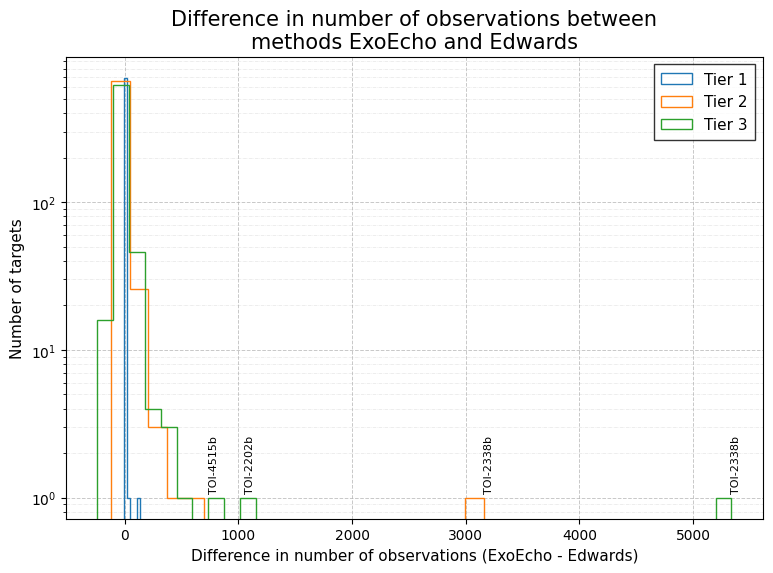

In [59]:
fig, ax = plt.subplots(figsize=(9,6)) 


target_list.hist("Tier 1 Observation num diff (ExoEcho-Edwards)", ax=ax, bins=5, histtype="step", label="Tier 1")
target_list.hist("Tier 2 Observation num diff (ExoEcho-Edwards)", ax=ax, bins=20, histtype="step", label="Tier 2")    
target_list.hist("Tier 3 Observation num diff (ExoEcho-Edwards)", ax=ax, bins=40, histtype="step", label="Tier 3")  

# adding target names of those with very large differences
for i in target_list[target_list["Tier 2 Observation num diff (ExoEcho-Edwards)"] > 700].index:
    ax.text(target_list.loc[i, "Tier 2 Observation num diff (ExoEcho-Edwards)"], 1.1, target_list.loc[i, "Planet Name"], rotation=90, fontsize=8)

for i in target_list[target_list["Tier 3 Observation num diff (ExoEcho-Edwards)"] > 700].index:
    ax.text(target_list.loc[i, "Tier 3 Observation num diff (ExoEcho-Edwards)"], 1.1, target_list.loc[i, "Planet Name"], rotation=90, fontsize=8)

# scale
ax.set_yscale('log')

# grid
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax.set_title("Difference in number of observations between\nmethods ExoEcho and Edwards", fontsize=15)

# labels
ax.set_xlabel("Difference in number of observations (ExoEcho - Edwards)", fontsize=11)
ax.set_ylabel("Number of targets", fontsize=11)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

# saving plot
plt.savefig("Results Plots/ExoEcho_Edwards_Observation_Diff.png", dpi=300, bbox_inches="tight")

plt.show()

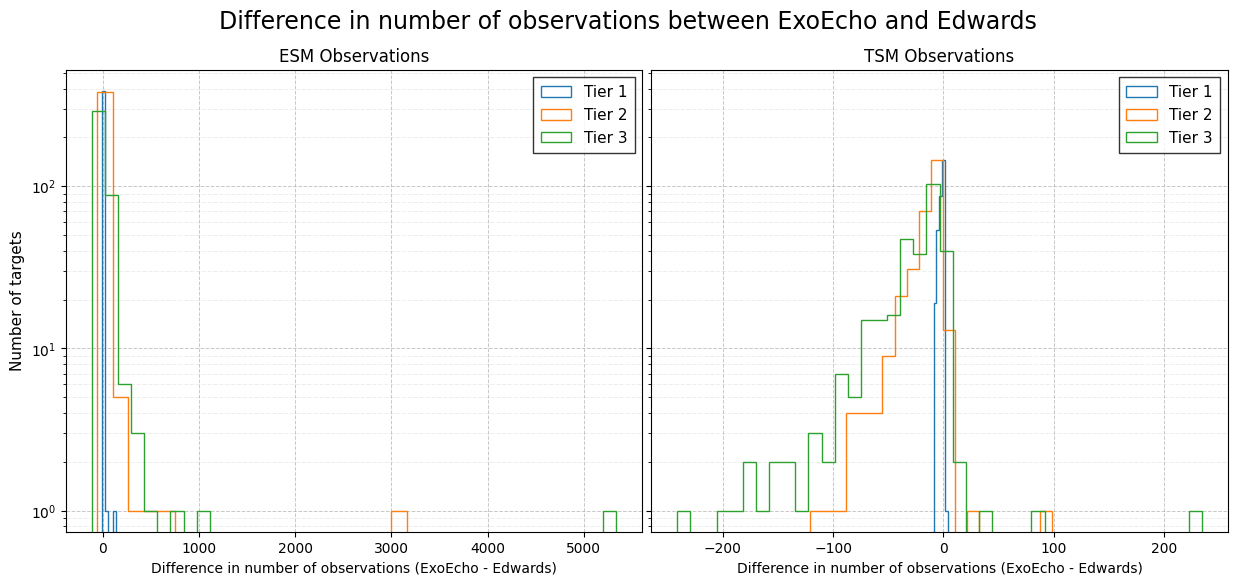

In [60]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,6), sharey=True) 

fig.suptitle("Difference in number of observations between ExoEcho and Edwards", fontsize=17)

## AX
esm_targets.hist("Tier 1 Observation num diff (ExoEcho-Edwards)", ax=ax, bins=5, histtype="step", label="Tier 1")
esm_targets.hist("Tier 2 Observation num diff (ExoEcho-Edwards)", ax=ax, bins=20, histtype="step", label="Tier 2")
esm_targets.hist("Tier 3 Observation num diff (ExoEcho-Edwards)", ax=ax, bins=40, histtype="step", label="Tier 3")

# scale
ax.set_yscale('log')

# grid
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax.set_title("ESM Observations", fontsize=12)

# labels
ax.set_xlabel("Difference in number of observations (ExoEcho - Edwards)", fontsize=10)
ax.set_ylabel("Number of targets", fontsize=11)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")


## AX1
tsm_targets.hist("Tier 1 Observation num diff (ExoEcho-Edwards)", ax=ax1, bins=5, histtype="step", label="Tier 1")
tsm_targets.hist("Tier 2 Observation num diff (ExoEcho-Edwards)", ax=ax1, bins=20, histtype="step", label="Tier 2")    
tsm_targets.hist("Tier 3 Observation num diff (ExoEcho-Edwards)", ax=ax1, bins=40, histtype="step", label="Tier 3")  

# scale
ax1.set_yscale('log')

# grid
ax1.grid(False)
ax1.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax1.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax1.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax1.set_title("TSM Observations", fontsize=12)

# labels
ax1.set_xlabel("Difference in number of observations (ExoEcho - Edwards)", fontsize=10)
# ax1.set_yticks([])

# legend
ax1.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.subplots_adjust(wspace=0.015, hspace=0)

plt.savefig("Results Plots/ESM_TSM_Observations_diff.png", dpi=300, bbox_inches="tight")

plt.show()

In [61]:
print("Planets with number of observations > 1000 at tier 2: ", target_list[target_list["Tier 2 Observations ExoEcho"] > 1000]["Planet Name"].values.tolist())
print("Number of observations for those planets at tier 2: ", target_list[target_list["Tier 2 Observations ExoEcho"] > 1000]["Tier 2 Observations ExoEcho"].values.tolist())

print("\n__________________________________________________________\n")

print("Planets with number of observations > 1000 at tier 3: ", target_list[target_list["Tier 3 Observations ExoEcho"] > 1000]["Planet Name"].values.tolist())
print("Number of observations for those planets at tier 3: ", target_list[target_list["Tier 3 Observations ExoEcho"] > 1000]["Tier 3 Observations ExoEcho"].values.tolist())

Planets with number of observations > 1000 at tier 2:  ['TOI-2338b']
Number of observations for those planets at tier 2:  [3233.0]

__________________________________________________________

Planets with number of observations > 1000 at tier 3:  ['TOI-2202b', 'TOI-2338b']
Number of observations for those planets at tier 3:  [1205.0, 5479.0]


### Looking into TOI-2338b, which has very high number of estimated observations

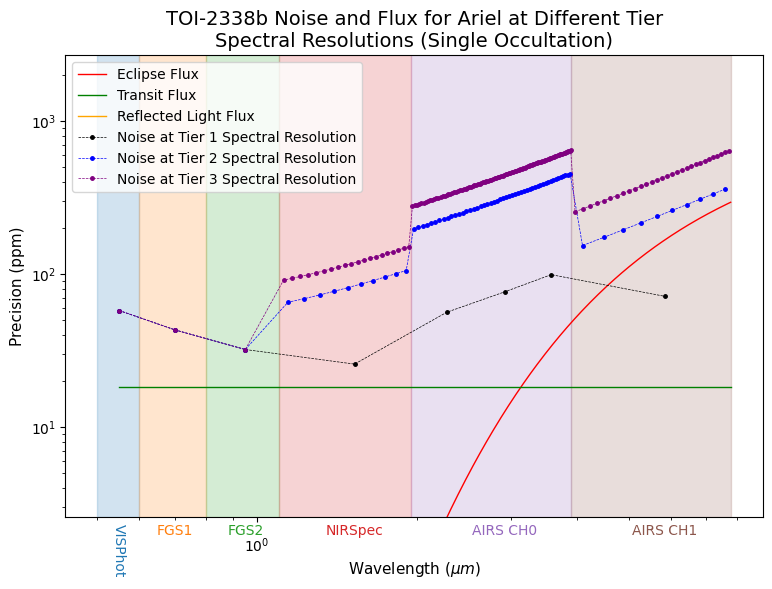

In [10]:
# plotting tiered precision profile for TOI-2338b, which has very high number of observations (low SNR)
Ariel.plotTieredPrecisionProfile("TOI-2338b")

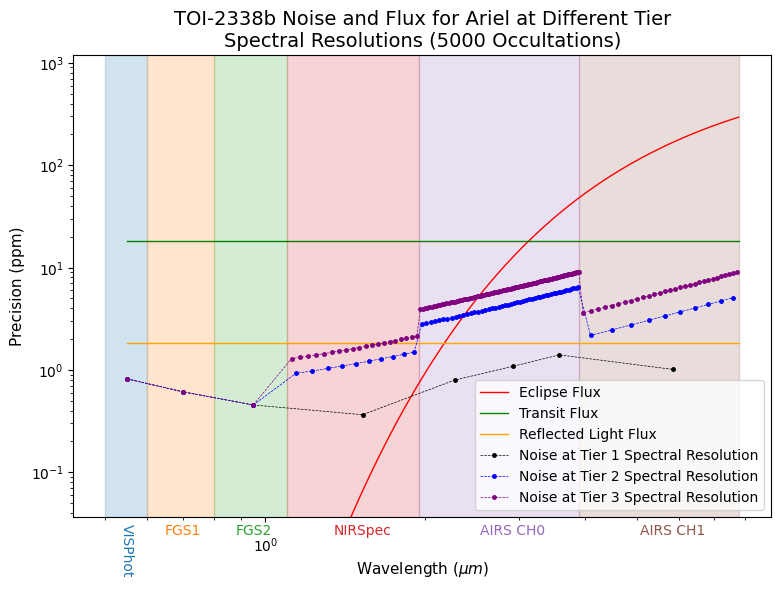

In [11]:
Ariel.plotTieredPrecisionProfile("TOI-2338b", observations=5000)

In [12]:
# print(Ariel.getPlanet(target_list, "TOI-2338b")[["Tier 1 Observations Coull", "Tier 2 Observations Coull", "Tier 3 Observations Coull"]])
# print(Ariel.getPlanet(target_list, "TOI-2338b")[["Tier 1 Observations Edwards", "Tier 2 Observations Edwards", "Tier 3 Observations Edwards"]])

Ariel.getPlanet(target_list, "TOI-2338b")[['Planet Radius [Rjup]', "Planet Period [days]"]]

,Planet Radius [Rjup],Planet Period [days]
667,1.0,22.65398


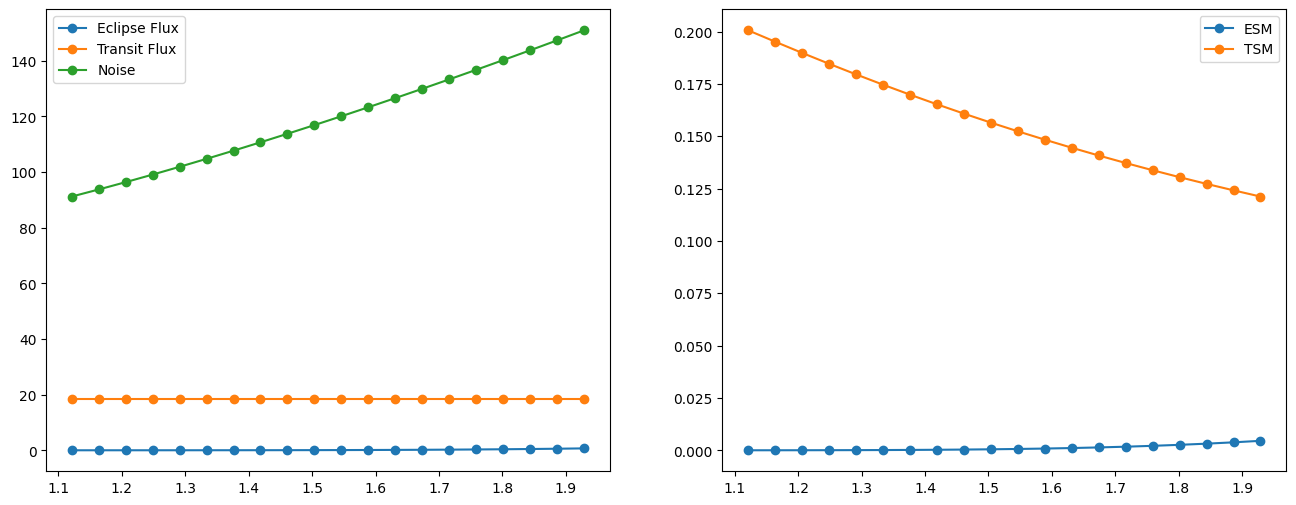

In [13]:
nirspec = Ariel.getInstrument('NIRSpec R=20')

nirspec.table[nirspec.getColumns("Eclipse Flux")]

fig, ax = plt.subplots(1,2, figsize=(16,6))
nirspec.plotParam("TOI-2338b", "Eclipse Flux", ax=ax[0], label="Eclipse Flux")
nirspec.plotParam("TOI-2338b", "Transit Flux", ax=ax[0], label="Transit Flux")
nirspec.plotParam("TOI-2338b", "Noise", ax=ax[0], label="Noise")

ax[0].legend()


nirspec.plotParam("TOI-2338b", "ESM", ax=ax[1], label="ESM")
nirspec.plotParam("TOI-2338b", "TSM", ax=ax[1], label="TSM")

ax[1].legend()

plt.show()

## Getting SNR distribution for targets

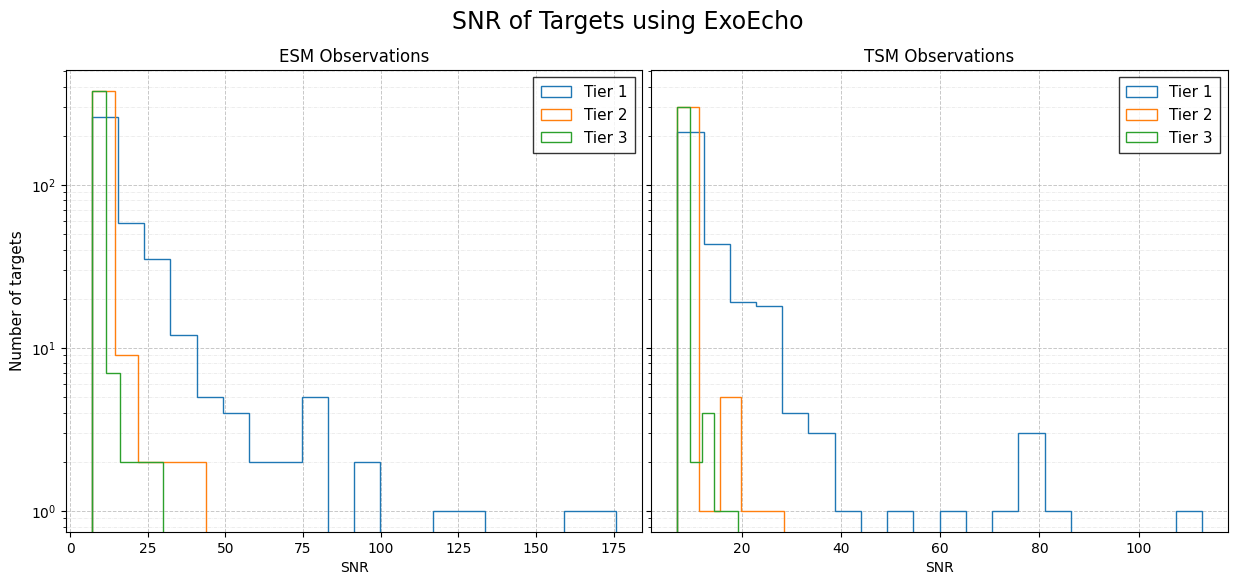

In [14]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,6), sharey=True) 

fig.suptitle("SNR of Targets using ExoEcho", fontsize=17)

## AX
esm_targets.hist("Tier 1 SNR ExoEcho", ax=ax, bins=20, histtype="step", label="Tier 1")
esm_targets.hist("Tier 2 SNR ExoEcho", ax=ax, bins=5, histtype="step", label="Tier 2")
esm_targets.hist("Tier 3 SNR ExoEcho", ax=ax, bins=5, histtype="step", label="Tier 3")

# scale
ax.set_yscale('log')

# grid
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax.set_title("ESM Observations", fontsize=12)

# labels
ax.set_xlabel("SNR", fontsize=10)
ax.set_ylabel("Number of targets", fontsize=11)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")


## AX1
tsm_targets.hist("Tier 1 SNR ExoEcho", ax=ax1, bins=20, histtype="step", label="Tier 1")
tsm_targets.hist("Tier 2 SNR ExoEcho", ax=ax1, bins=5, histtype="step", label="Tier 2")    
tsm_targets.hist("Tier 3 SNR ExoEcho", ax=ax1, bins=5, histtype="step", label="Tier 3")  

# scale
ax1.set_yscale('log')

# grid
ax1.grid(False)
ax1.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax1.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax1.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax1.set_title("TSM Observations", fontsize=12)

# labels
ax1.set_xlabel("SNR", fontsize=10)
# ax1.set_yticks([])

# legend
ax1.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.subplots_adjust(wspace=0.015, hspace=0)

plt.savefig("Results Plots/ESM_TSM_SNR.png", dpi=300, bbox_inches="tight")

plt.show()

## number of observations vs SNR to see if it looks as expected

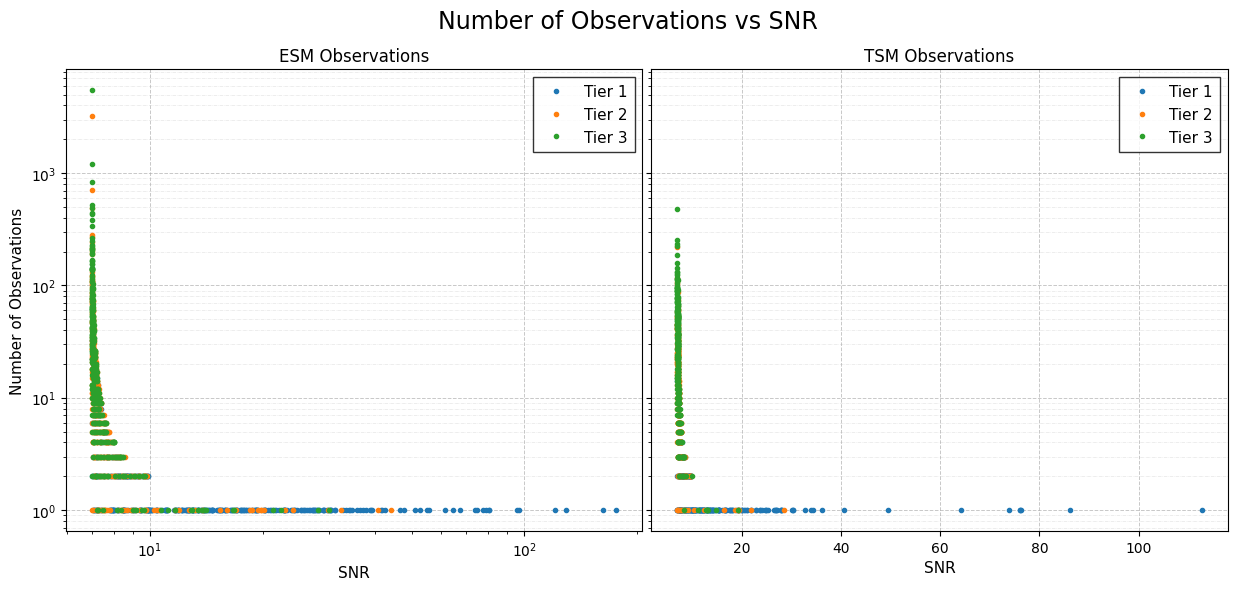

In [15]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,6), sharey=True) 

fig.suptitle("Number of Observations vs SNR", fontsize=17)

## AX
esm_targets.plot("Tier 1 SNR ExoEcho", "Tier 1 Observations ExoEcho", linestyle='', marker='.', ax=ax, label="Tier 1")
esm_targets.plot("Tier 2 SNR ExoEcho", "Tier 2 Observations ExoEcho", linestyle='', marker='.', ax=ax, label="Tier 2")
esm_targets.plot("Tier 3 SNR ExoEcho", "Tier 3 Observations ExoEcho", linestyle='', marker='.', ax=ax, label="Tier 3")

# scale
ax.set_yscale('log')
ax.set_xscale('log')

# grid
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax.set_title("ESM Observations", fontsize=12)

# labels
ax.set_xlabel("SNR", fontsize=11)
ax.set_ylabel("Number of Observations", fontsize=11)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")


## AX1
tsm_targets.plot("Tier 1 SNR ExoEcho", "Tier 1 Observations ExoEcho", linestyle='', marker='.', ax=ax1, label="Tier 1")
tsm_targets.plot("Tier 2 SNR ExoEcho", "Tier 2 Observations ExoEcho", linestyle='', marker='.', ax=ax1, label="Tier 2")    
tsm_targets.plot("Tier 3 SNR ExoEcho", "Tier 3 Observations ExoEcho", linestyle='', marker='.', ax=ax1, label="Tier 3")  

# scale
# ax1.set_yscale('log')

# grid
ax1.grid(False)
ax1.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax1.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax1.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax1.set_title("TSM Observations", fontsize=12)

# labels
ax1.set_xlabel("SNR", fontsize=11)
# ax1.set_yticks([])

# legend
ax1.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.subplots_adjust(wspace=0.015, hspace=0)

plt.savefig("Results Plots/ESM_TSM_Observations_SNR.png", dpi=300, bbox_inches="tight")

plt.show()

## Cumulative time plot

In [16]:
## Ranking targets by exposure time (i.e., event duration)

sorted_targets = target_list.sort_values("Transit Duration [hrs]", ascending=True)
sorted_esm = sorted_targets[sorted_targets["SNR param"] == "ESM"]
sorted_tsm = sorted_targets[sorted_targets["SNR param"] == "TSM"]

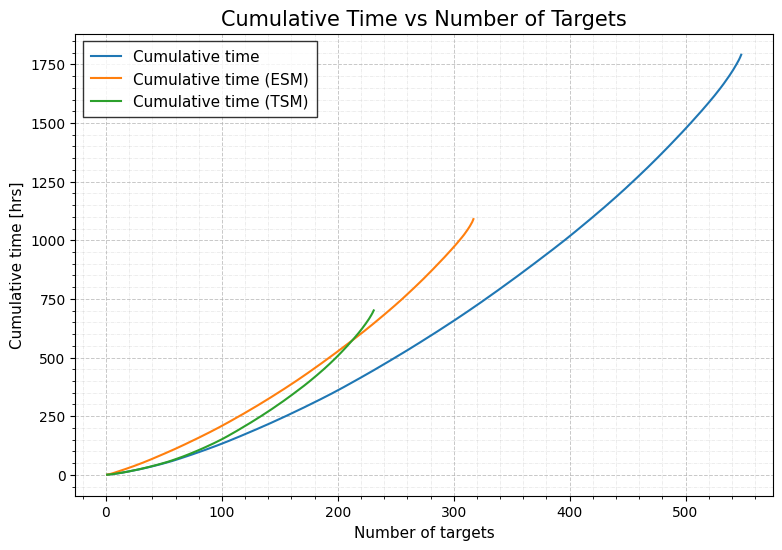

In [17]:
# plotting sorted_targets in cumulative time vs number of targets

fig, ax = plt.subplots(figsize=(9,6))

# plotting
plot = ax.plot(range(1, len(sorted_targets)+1), sorted_targets["Transit Duration [hrs]"].cumsum(), label="Cumulative time")
ax.plot(range(1, len(sorted_esm)+1), sorted_esm["Transit Duration [hrs]"].cumsum(), label="Cumulative time (ESM)")
ax.plot(range(1, len(sorted_tsm)+1), sorted_tsm["Transit Duration [hrs]"].cumsum(), label="Cumulative time (TSM)")

# grid
ax.grid(which='major', linestyle='--', linewidth=.7, alpha=.7)
ax.grid(which='minor', linestyle='-.', linewidth=0.4, alpha=.4)
ax.minorticks_on()

# labels
ax.set_xlabel("Number of targets", fontsize=11)
ax.set_ylabel("Cumulative time [hrs]", fontsize=11)

# title
ax.set_title("Cumulative Time vs Number of Targets", fontsize=15)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.savefig("Results Plots/Cumulative_Time_vs_Targets.png", dpi=300, bbox_inches="tight")

plt.show()